In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

In [2]:
def sigmoid(x):
    return 1. / (1. + numpy.exp(-x))

def softmax(Z):
    y = numpy.exp(Z)
    y /= numpy.sum(y, axis=0)
    return y

def loss_function(Y, T, Z): # cross-entropy loss
    tmp = - numpy.sum(numpy.sum(T * Z, axis=0) - numpy.log(numpy.sum(numpy.exp(Z), axis=0)))
    return float(tmp)
                                                   
def forward(X, W1, W2):
    H = sigmoid(W1.dot(X))
    H[0,:] = 1. # bias
    Z = W2.dot(H)
    return softmax(Z), H, Z

def accuracy(X, T, W1, W2):
    Y, _, _ = forward(X.T, W1, W2)
    return numpy.sum(numpy.argmax(Y, axis=0) == numpy.argmax(T.T, axis=0)) / len(T) # compare maximum class in target and y (basically 1 in one hot encoding)

def gradient_layer_1(X, W, H, Y, T):
    tmp = W.T.dot(Y - T) * H * (1. - H)
    return tmp.dot(X.T)

def gradient_layer_2(H, Y, T):
    return (Y-T).dot(H.T)

def descent(X, T, W1, W2, eta):
    Y, H, Z = forward(X, W1, W2)
    loss = loss_function(Y, T, Z)
    W1 -= eta * gradient_layer_1(X, W2, H, Y, T)
    W2 -= eta * gradient_layer_2(H, Y, T)
    return W1, W2, loss 
                           
def gradient_descent(X, T, W1, W2, eta, epochs):
    loss_arr = []
    acc_arr = []
    for epoch in range(epochs):
        W1, W2, J = descent(X.T, T.T, numpy.copy(W1), numpy.copy(W2), eta)
        loss_arr.append(J)
        acc_arr.append(accuracy(X, T, W1, W2))
    return W1, W2, loss_arr, acc_arr

def load_data(filename):
    X, T = [],[]
    
    # read dataset
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            arr = numpy.array(line.split(',')).astype(numpy.float)
            X.append(arr[:-1]) # add all elements without last one
            T.append(arr[-1]) # last element is the target value
    f.close()

    X = numpy.hstack((numpy.ones((len(X),1)), numpy.array(X))) # add bias term
    X /= numpy.max(X, axis=0) # normalize data
    T = numpy.array(T)
    return X, T

def plot_data(loss_arr, acc_arr, epochs):
    x = numpy.arange(0, epochs)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,8))
    ax1.semilogy(x,loss_arr, label='loss')
    ax2.semilogy(x,acc_arr, label='accuracy', color='red')
    fig.legend()

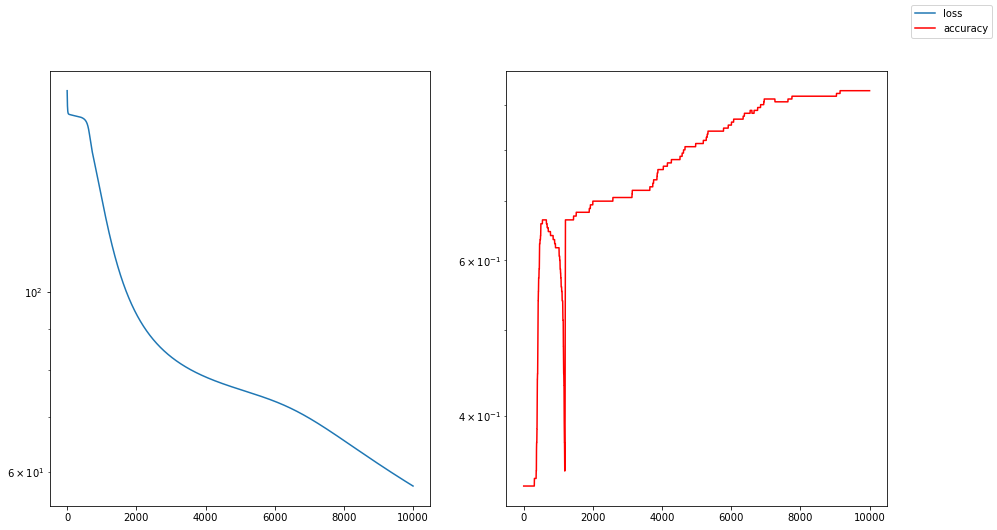

In [3]:
# Iris Dataset
data = load_iris()

X = numpy.array(data.data)
X = numpy.hstack((numpy.ones((X.shape[0], 1)), X))

# one-hot encoding of target
T = numpy.zeros((X.shape[0], 3)) # 3 different classes
for i, t in enumerate(data.target):
    T[i,t] = 1

# hyperparameters
eta = 0.0001
epochs = 10000
k = 10

## init weights
W1 = numpy.random.uniform(size=(k+1,X.shape[1])) # first layer weights
W2 = numpy.random.uniform(size=(T.shape[1],k+1)) # second layer weights

## run gradient descent
W1, W2, loss_arr, acc_arr = gradient_descent(X, T, W1.copy(), W2.copy(), eta, epochs)
  
## plot loss & accuracy
plot_data(loss_arr, acc_arr, epochs)

In [4]:
'Accuracy: ' + f'{acc_arr[-1]:3.4}'

'Accuracy: 0.9333'

In [5]:
'Loss: ' + f'{loss_arr[-1]:3.4}'

'Loss: 57.62'

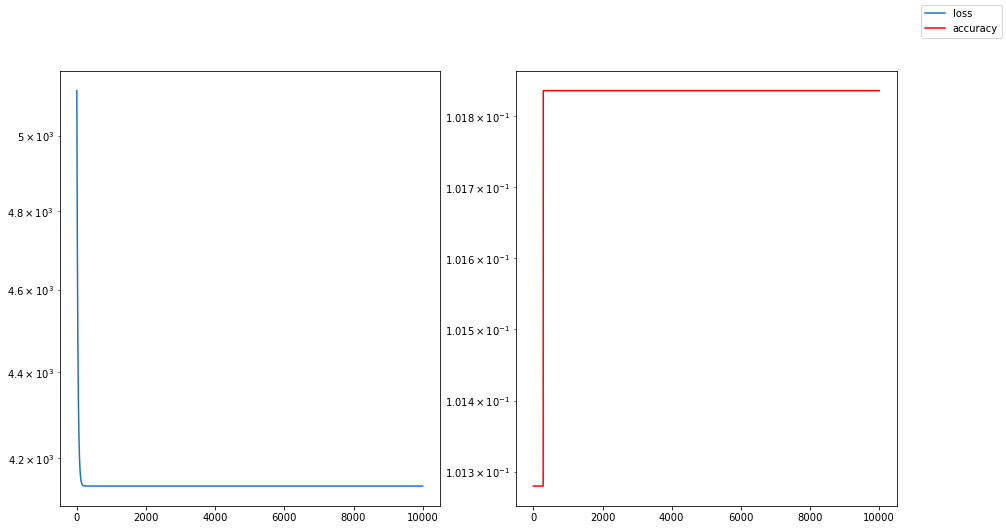

In [6]:
# Digit Dataset
data = load_digits()

X = numpy.array(data.data)
X = numpy.hstack((numpy.ones((X.shape[0], 1)), X))
T = data.target

# one-hot encoding of target
T = numpy.zeros((X.shape[0], 10)) # 10 different classes
for i, t in enumerate(data.target):
    T[i,t] = 1

# hyperparameters
eta = 0.00001
epochs = 10000
k = 10

## init weights
W1 = numpy.random.uniform(size=(k+1,X.shape[1])) # first layer weights
W2 = numpy.random.uniform(size=(T.shape[1],k+1)) # second layer weights

## run gradient descent
W1, W2, loss_arr, acc_arr = gradient_descent(X, T, W1.copy(), W2.copy(), eta, epochs)
  
## plot loss & accuracy
plot_data(loss_arr, acc_arr, epochs)

In [7]:
'Accuracy: ' + f'{acc_arr[-1]:3.4}'

'Accuracy: 0.1018'

In [8]:
'Loss: ' + f'{loss_arr[-1]:3.4}'

'Loss: 4.138e+03'